# 🔢 Multiple Linear Regression Assignment

- Assignment Task:

    - Your task is to perform a multiple linear regression analysis to predict the Profit of startup company based on the given attributes of 50_Startups.csv file.

- Tasks:-

    - 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

    - 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

    - 3.Buil a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

    - 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

### **NOTE**:

- Ensure to properly comment your code and provide explanations for your analysis.

- Include any assumptions made during the analysis and discuss their implications.

# 📝 Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 📊 Importing Dataset

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# 🔍 Exploring Data along with EDA

In [3]:
startup.shape

(50, 5)

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- Some columns have outliers as the maximum value is more than the 75th percentile value.

In [6]:
startup.duplicated().sum()

np.int64(0)

In [7]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- No duplicates & no missing values, data seems pretty clean.

In [8]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
startup['State'].nunique()

3

In [10]:
startup['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# 📈 Data Visualizations

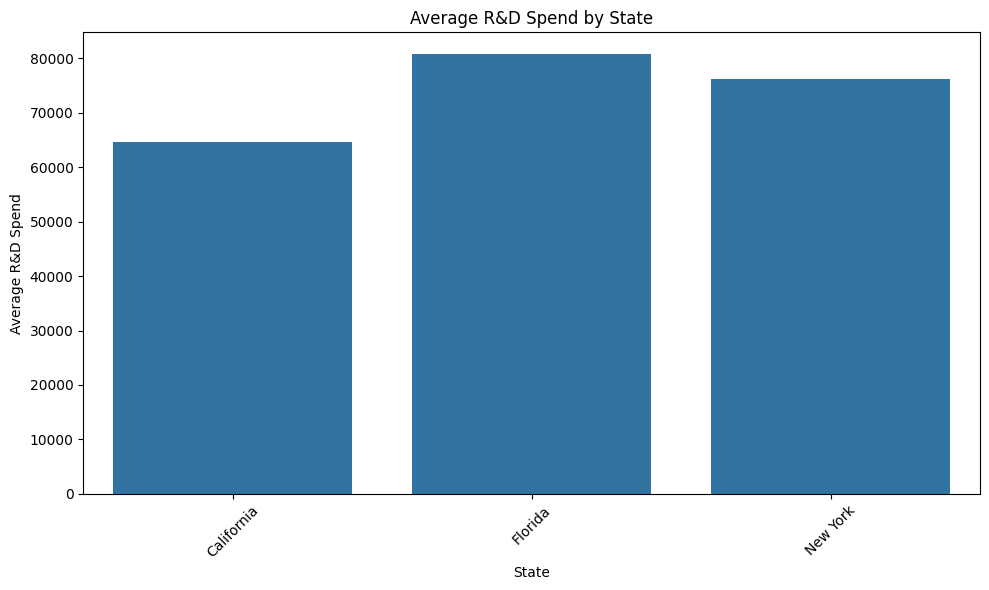

In [11]:
# Group & aggregate
grouped = startup.groupby('State')['R&D Spend'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='State', y='R&D Spend')
plt.title('Average R&D Spend by State')
plt.xlabel('State')
plt.ylabel('Average R&D Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

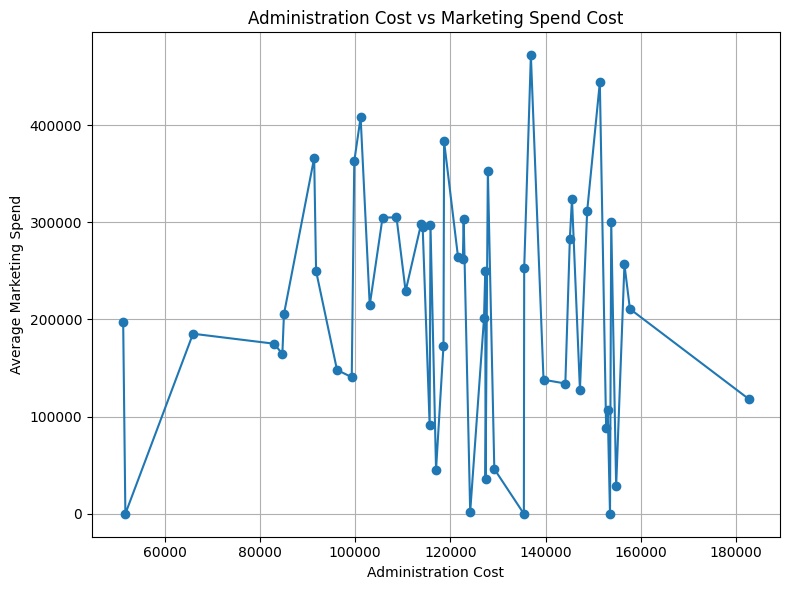

In [12]:
# Aggregate the data
cost = startup.groupby('Administration')['Marketing Spend'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(cost['Administration'], cost['Marketing Spend'], marker='o')
plt.title('Administration Cost vs Marketing Spend Cost')
plt.xlabel('Administration Cost')
plt.ylabel('Average Marketing Spend')
plt.grid(True)
plt.tight_layout()
plt.show()

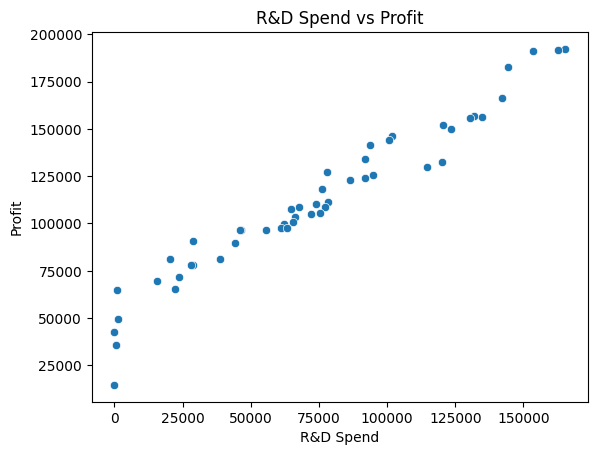

In [13]:
# R&D Spend vs Profit

sns.scatterplot(data=startup, x='R&D Spend', y='Profit')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

- A positive upward relation between R&D Spend & Profit.

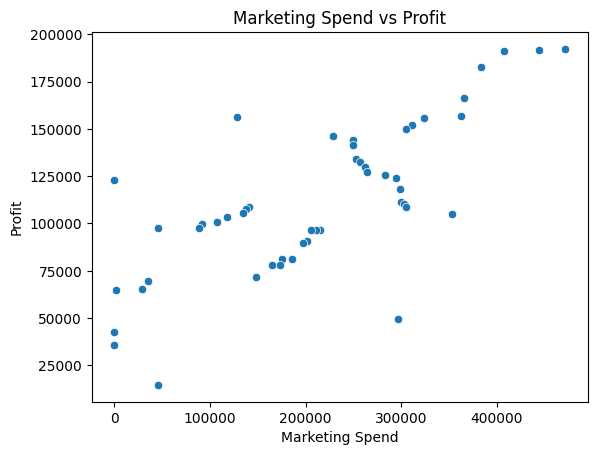

In [14]:
# Marketing Spend vs Profit

sns.scatterplot(data=startup, x='Marketing Spend', y='Profit')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

- A positive upward relation between Marketing Spend & Profit but a bit scattered.

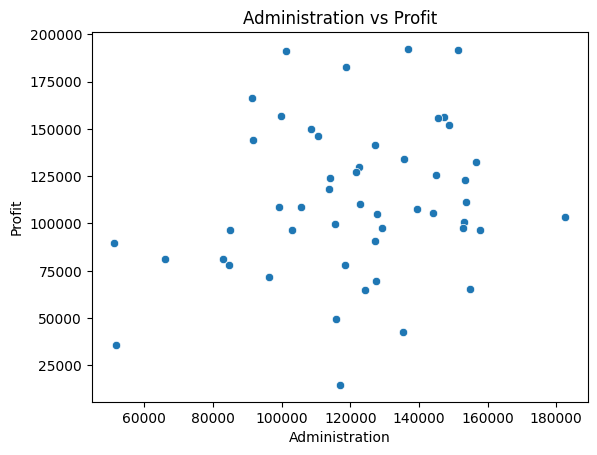

In [15]:
# Administration vs Profit

sns.scatterplot(data=startup, x='Administration', y='Profit')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

- A positive upward relation between Administration & Profit but the points are very scattered.

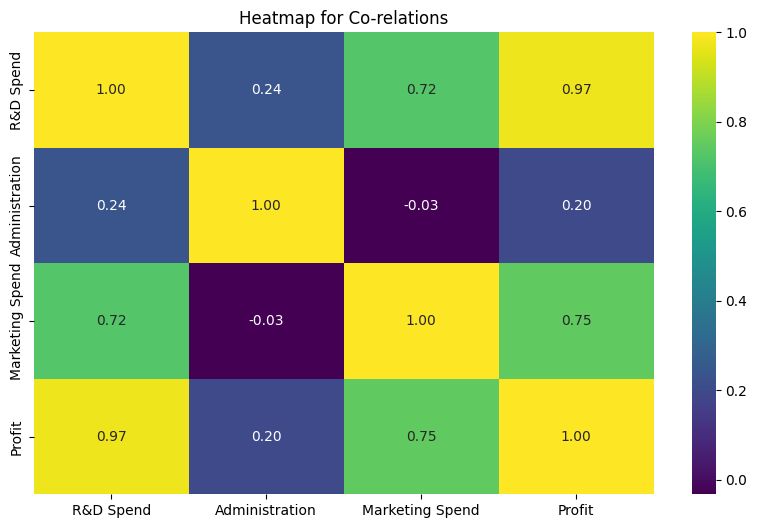

In [16]:
# Heatmap
startup_numeric = startup.drop('State', axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(startup_numeric.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Heatmap for Co-relations')
plt.show()

- There are many co-relations which are pure & strong.
- Columns like 'Profit & R&D Spend', 'Marketing Spend & Profit', 'Marketing Spend & R&D Spend' have positive strong co-relations.

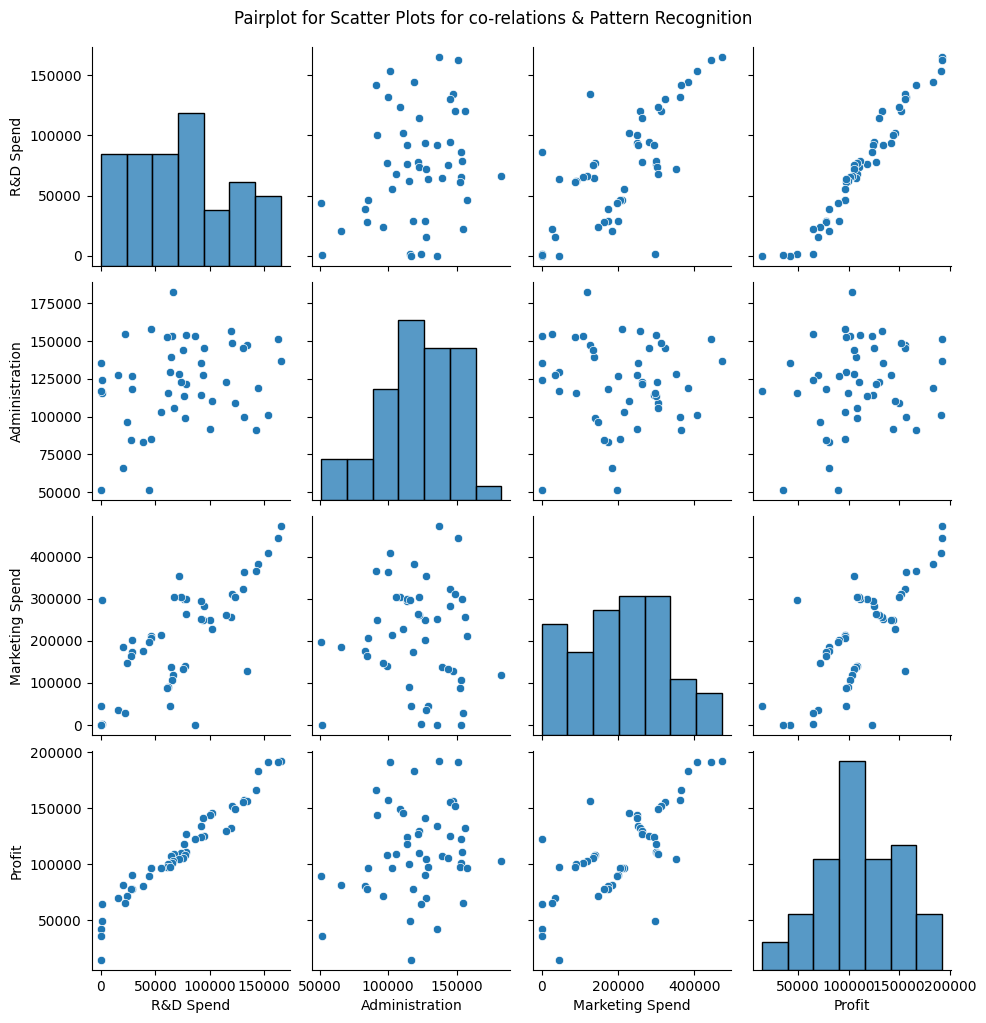

In [17]:
# Pairplots

pair = sns.pairplot(startup)
pair.fig.suptitle('Pairplot for Scatter Plots for co-relations & Pattern Recognition', y=1.02)
plt.show()

- The co-relations seen in this Pairplot are pretty close to Strong co-relations with Profit.
- But, the co-relations between columns are positive but not very strong.

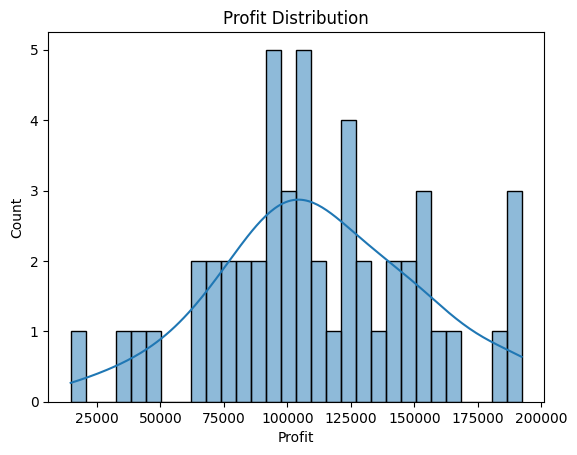

In [18]:
# Distribution of Profit

sns.histplot(data=startup, x='Profit', bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()

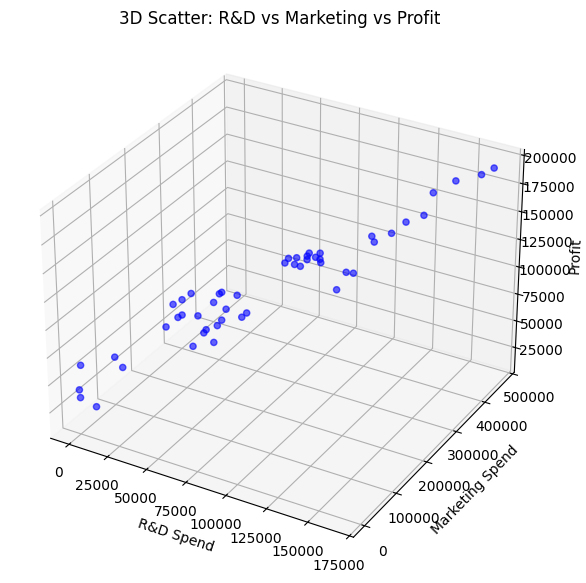

In [19]:
# 3D Scatter Plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(startup['R&D Spend'], startup['Marketing Spend'], startup['Profit'], c='blue', alpha=0.6)
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')
plt.title('3D Scatter: R&D vs Marketing vs Profit')
plt.show()

# 📝 Interpretation for the above Graph

- This 3D scatter plot visualizes how R&D Spend and Marketing Spend jointly influence Profit.
- Each point represents a startup, positioned by its R&D and Marketing investments, with Profit as the third dimension.
- The upward spread of points suggests that higher R&D and Marketing spending generally correlate with higher profit.
- However, the distribution also shows variability—some startups with similar spend levels yield different profits.
- This indicates that while investment is important, other factors (like strategy, execution, or market conditions) may also play a role.
- The plot helps identify clusters of high-performing startups and potential outliers worth investigating.

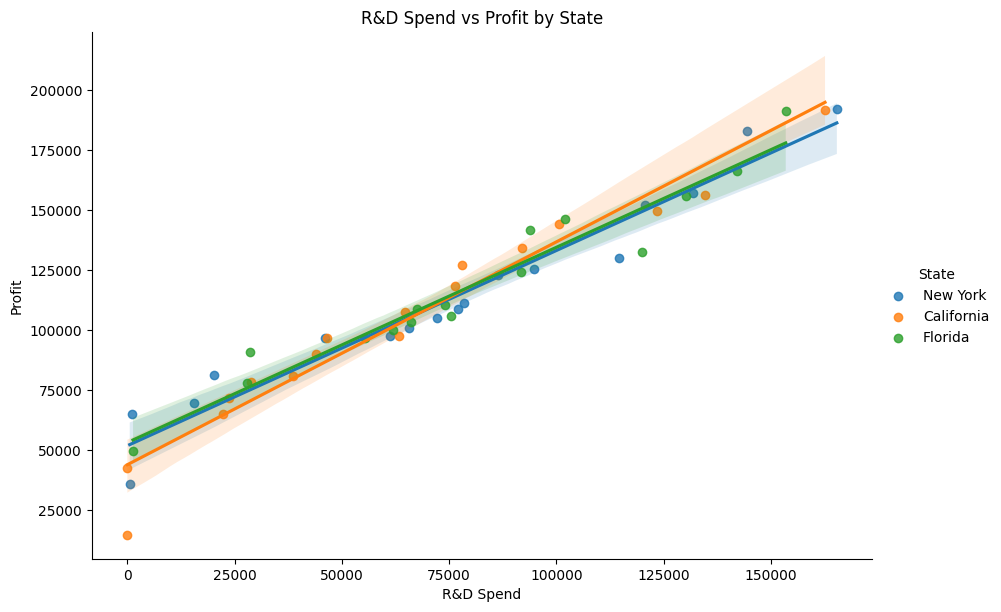

In [20]:
# Regression Plot with Hue
# Purpose: Show regression lines for different categories.

sns.lmplot(data=startup, x='R&D Spend', y='Profit', hue='State', height=6, aspect=1.5)
plt.title('R&D Spend vs Profit by State')
plt.show()

# 📝 Interpretation for the above Graph

- This plot visualizes the relationship between R&D Spend and Profit across three states.
- Each point represents a startup, color-coded by its state: New York (blue), California (orange), Florida (green).
- The trend lines show a positive correlation in all three states—higher R&D spending tends to result in higher profit.
- California shows the steepest slope, suggesting R&D investment may be most effective there.
- Florida's trend is flatter, indicating a weaker correlation between R&D and profit.
- Shaded confidence intervals around each line reflect the uncertainty in the linear fit.
- This comparison helps identify regional differences in how R&D spending translates into business success.

In [21]:
# Encoding The State column as it contains 3 states only

from sklearn.preprocessing import LabelEncoder

# Encode 'State' column
le = LabelEncoder()
startup['State'] = le.fit_transform(startup['State'])

In [22]:
X = startup.drop(columns = ['Profit'], axis = 1)
y = startup['Profit']

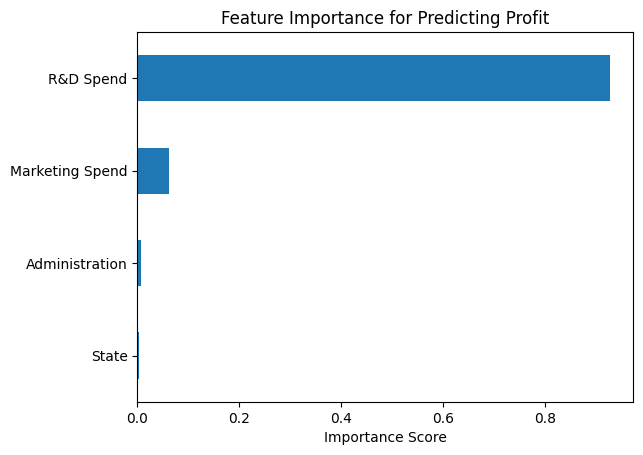

In [23]:
# Feature Importance Plot (if using regression or tree model)
# Purpose: Show which features contribute most to predicting Profit.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)

importances.sort_values().plot(kind='barh')
plt.title('Feature Importance for Predicting Profit')
plt.xlabel('Importance Score')
plt.show()

- Only 2 columns have the most score for Importance while predicting Profit &they are, Marketing Spend & R&D Spend.

# 🏗️ Model Building

Coefficients: [  0.80575968  -0.02682585   0.02722767 -22.32057723]
Intercept: 50142.50644347623
R-squared Score: 0.9507462044842656
Mean Absolute Error (MAE): 6468.11
Mean Squared Error (MSE): 78416791.02
Root Mean Squared Error (RMSE): 8855.33
Mean Absolute Percentage Error (MAPE): 10.60%


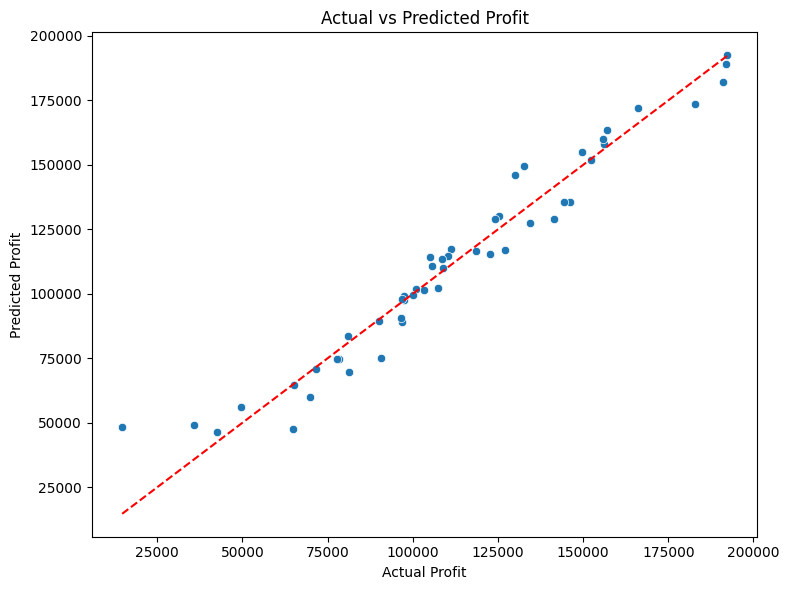

In [24]:
# Training model & evaluating

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Metrics
coefficients = model.coef_
intercept = model.intercept_
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = (abs((y - y_pred) / y).mean()) * 100

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared Score:", r2)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.savefig('actual_vs_predicted_profit.png')
plt.show()

### 📊 Model Performance
- **R² = 0.95** → The model explains about **95% of the variance** in Profit. That’s a very strong fit, meaning the predictors capture most of the signal.
- **MAE ≈ 6.5K** → On average, predictions are off by about **₹6,500** (if we assume the dataset is in INR/USD units). That’s relatively small compared to the profit scale.
- **RMSE ≈ 8.8K** → Errors are slightly larger when squared, but still within a reasonable range. This shows the model isn’t making huge mistakes.
- **MAPE ≈ 10.6%** → Predictions are within about **±11% of actual profits** on average, which is quite acceptable for business forecasting.

---

### 🔍 Coefficients Interpretation
- **R&D Spend (0.81)** → For every additional unit spent on R&D, profit increases by ~0.81 units, holding other factors constant. This is the **most influential driver**.
- **Administration (-0.027)** → Very small negative effect. Suggests administration costs don’t strongly contribute to profit, and may even slightly reduce it.
- **Marketing Spend (0.027)** → Small positive effect, but much weaker than R&D. Marketing spend helps, but not nearly as much as R&D.
- **State (-22.32)** → Since you used `LabelEncoder`, this coefficient is not directly interpretable (because the numeric codes don’t represent real order). It just absorbs some variance due to categorical differences.

---

### 🧠 Key Takeaways
- **R&D Spend dominates** as the key factor driving profit.  
- **Marketing Spend has marginal impact**, and **Administration is negligible**.  
- **State differences exist**, but to interpret them properly, you’d need **dummy variables (one-hot encoding)** instead of label encoding.  
- The model is **highly accurate** on this dataset, but with only 50 records, results should be validated with cross-validation or tested on new data to ensure generalization.

# 🧪 Testing model on a Synthetic New Data

In [25]:
# Example new test data (synthetic)
test_data = pd.DataFrame({
    'R&D Spend': [150000, 120000, 50000],
    'Administration': [130000, 90000, 110000],
    'Marketing Spend': [200000, 150000, 50000],
    'State': ['New York', 'California', 'Florida']
})

# Encode 'State' same way as training
test_data['State'] = le.transform(test_data['State'])

# Predict profits
predictions = model.predict(test_data)
print("Predicted Profits:", predictions)

Predicted Profits: [172919.98978782 148503.49127581  88818.709425  ]


In [26]:
# New synthetic test data
test_data2 = pd.DataFrame({
    'R&D Spend': [180000, 80000, 40000, 100000],
    'Administration': [120000, 100000, 90000, 150000],
    'Marketing Spend': [250000, 120000, 60000, 200000],
    'State': ['California', 'Florida', 'New York', 'California']
})

# Encode 'State' using the same LabelEncoder fitted earlier
test_data2['State'] = le.transform(test_data2['State'])

# Predict profits
predictions2 = model.predict(test_data2)
print("Predicted Profits for new synthetic data:\n", predictions2)

Predicted Profits for new synthetic data:
 [198767.0631993  115165.69506615  81547.58581653 132140.13010839]
